In [1]:
"""Importerar bibliotek och funktioner."""

import matplotlib.pyplot as plt
import src.metrics as me 
import src.io_utils as io
import src.metrics as me
import src.viz as vi
import src.ecommerce as ec


In [2]:
#Laddar in datta och förbereder data

df_raw = io.load_data("data/ecommerce_sales.csv")

df = io.clean_data(df_raw)

df['month'] = df['date'].dt.to_period('M')  # Tar ut månaden från datumet

df['day_of_week'] = df['date'].dt.day_name() # Tar ur veckodagen från datumet


# Bakgrund och nyckeltal
I vår rapport har vi analyserat e-handlen i 5 olika städer. 
Nedan presneteras en snabb sammanfattning av nyckeltal.

In [3]:
ec.DataProccesing(df).key_words()

Aov: 1401.11 kr per order. 
Antalet ordrar: 2500 st. 
Inkomst: 3502767.23 kr. 
Antal enheter: 7463 st.


# Fördelningskurva

Fördelning av intäkt är höger lutande. 

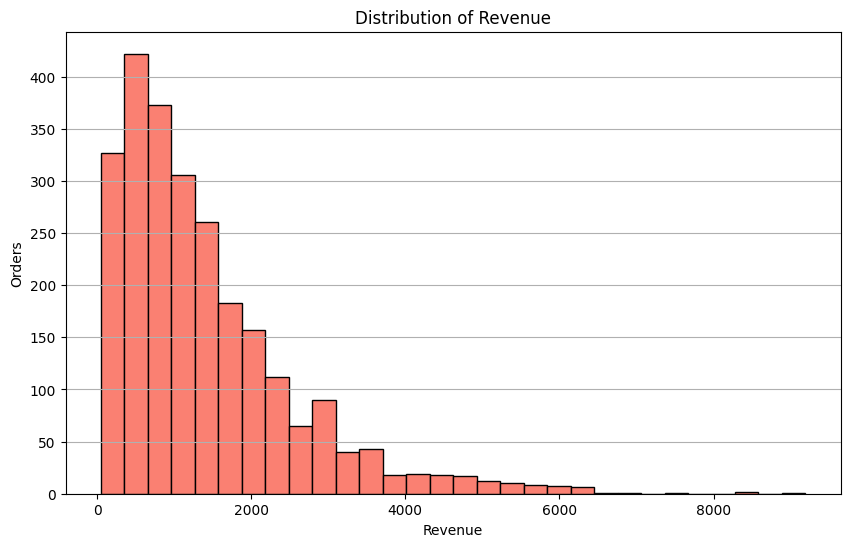

In [4]:
vi.distro_of_rev(df)

# Vad säljer vi
Diagrammen visar vilka kategorier som driver mest intäkt samt AOV per kategori. Vid analys av diagram så ser man att elektronik driver intäkt mest per kategori.

In [ ]:
by_category = me.groupby_category(df)

aov = me.average_vaule_order(df)
fig, axes = plt.subplots(2, 2, figsize=(11, 8), sharex=False, sharey=False)
vi.bar(axes[0,0], by_category['category'], by_category['total'], 'Total intäkt per kategori', 'Kategorier', 'Total intäkt')
vi.bar(axes[0,1], by_category['category'], by_category['antal'], 'Antal ordrar per kategori', 'Kategorier', 'Antal ordrar')
vi.bar(axes[1,0], by_category['category'], by_category['medel'], 'Medelintäkt per kategori', 'Kategorier', 'Medelvärde intäkt')
axes[1,0].axhline(aov, linestyle='--', color='black', linewidth=2, label=f'Medelvärde totala inköp {aov} kr' ) 
axes[1,0].legend()
vi.box(axes[1,1],df,'units','category','Antal enheter per order - Kategori', 'Kategorier', 'Enheter per order',)
fig.suptitle('Översikt - Kategorier', fontsize=16)
plt.tight_layout()


# Var säljer vi
Diagrammet visar vilka städer som driver mest intäkt

Stockholm driver mest intäkt

city
Stockholm    1227201.94
Göteborg      859019.65
Malmö         567926.32
Uppsala       551478.42
Västerås      297140.90
Name: revenue, dtype: float64


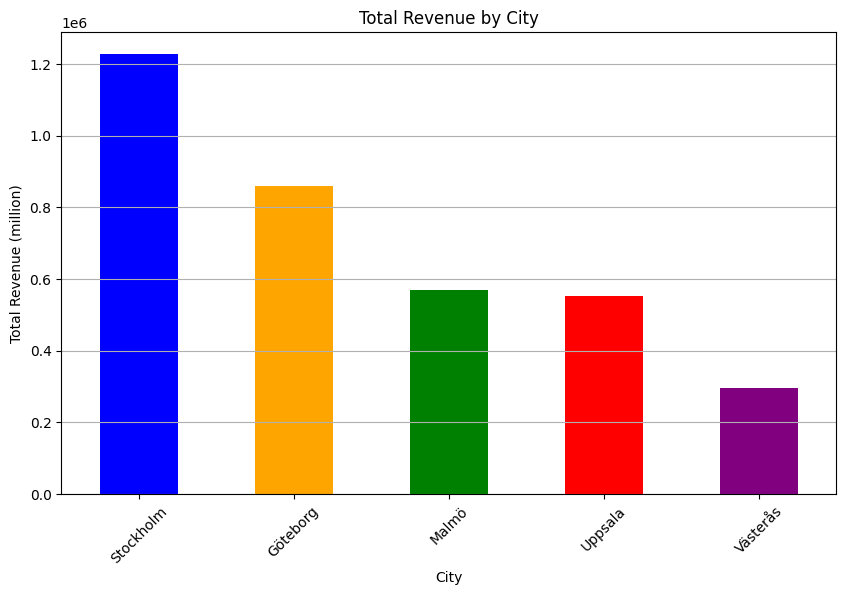

In [ ]:
print(me.city_revenue(df))
vi.plot_city_revenue(df)



In [9]:
top_3_category = by_category[['category','total']].head(3)

print(f'Topp 3 bäst säljande kategorier:\n\n {top_3_category}')

Topp 3 bäst säljande kategorier:

       category       total
0  Electronics  1364228.07
1       Sports   734653.42
2     Clothing   586744.91


# När säljer vi
Diagrammet visar antal ordar per veckodag och månad.

     month  num_orders
0  2024-01         445
1  2024-02         357
2  2024-03         411
3  2024-04         432
4  2024-05         433
5  2024-06         422


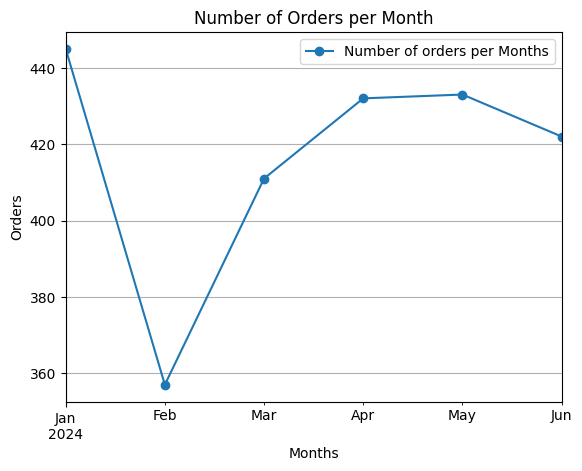

  day_of_week  num_order_per_week
1      Monday                 368
5     Tuesday                 354
6   Wednesday                 346
4    Thursday                 361
0      Friday                 357
2    Saturday                 355
3      Sunday                 359


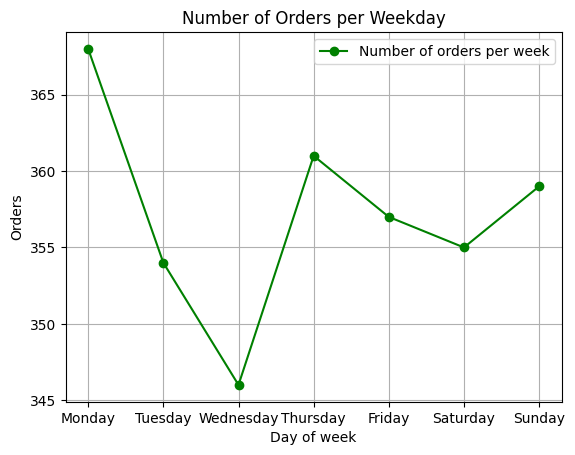

In [7]:
print(me.order_per_month(df))
vi.plot_orders_month(df)

print(me.order_per_weekday(df))
vi.plot_orders_weekday(df)




# Topplistor 


In [10]:
top_3_category = by_category[['category','total']].head(3)

print(f'Topp 3 bäst säljande kategorier:\n\n {top_3_category}')

Topp 3 bäst säljande kategorier:

       category       total
0  Electronics  1364228.07
1       Sports   734653.42
2     Clothing   586744.91


# Avvikelser och Rekomendatioen
Här får vi se vad vi lägger in när vi tagit ut olika data
- Eventuella avvikelser - något oväntat mönster som sticker ut?
- Ni ska avsluta rapporten med 2-3 korta rekommendationer (punktlista) baserat på era resultat, 
- t.ex. “Satsa på kategori X i stad Y under månad Z